# Cleaning Data Exercises

For the exercises, you will be cleaning data in your chosen data set. [Towards Data Science](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d) outlines the steps we should take to clean data using a different data set from Kaggle. While you should use this article as a reference, make sure not to copy paste as the two data sets are very different!

To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

In [5]:
# Import pandas and any other libraries you need here. HINT: Check out the article to see what they imported to get started!
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
# Create a new dataframe from your CSV
df=pd.read_csv("Rat_Sightings.csv")


In [7]:
# Print out any information you need to understand your dataframe
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31464015,09/04/2015 12:00:00 AM,09/18/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10006.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.707772,-74.012963,"(40.70777155363643, -74.01296309970473)"
1,31464024,09/04/2015 12:00:00 AM,10/28/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,10306.0,2270 HYLAN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.575209,-74.104547,"(40.575209242947444, -74.1045465185469)"
2,31464025,09/04/2015 12:00:00 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,10310.0,758 POST AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.631236,-74.126878,"(40.63123555151668, -74.12687759748677)"
3,31464026,09/04/2015 12:00:00 AM,09/14/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11206.0,198 SCHOLES STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708987,-73.941207,"(40.70898692345805, -73.94120690238431)"
4,31464027,09/04/2015 12:00:00 AM,09/22/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10462.0,2138 WALLACE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.854130,-73.864813,"(40.85413014360452, -73.86481331044513)"


Now you have a dataframe set up, you are ready to dive in and start cleaning!

## Missing Data

In the Towards Data Science article, they list 3 techniques for detecting any missing data frame. Try all three before deciding on a way to solve any missing data issues.

<AxesSubplot:>

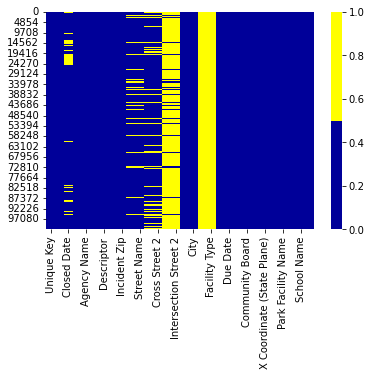

In [8]:
# Plot a heatmap of any missing data
cols=df.columns[:30]
colors=['#000099','#ffff00']
sns.heatmap(df[cols].isnull(),cmap=sns.color_palette(colors))

In [10]:
# Try out a missing data percentage list! 
for cols in df:
    pct_missing=np.mean(df[cols].isnull())
    print('{}-{}%'.format(cols,round(pct_missing*100)))

Unique Key-0%
Created Date-0%
Closed Date-11%
Agency-0%
Agency Name-0%
Complaint Type-0%
Descriptor-0%
Location Type-0%
Incident Zip-0%
Incident Address-9%
Street Name-9%
Cross Street 1-16%
Cross Street 2-16%
Intersection Street 1-91%
Intersection Street 2-91%
Address Type-0%
City-0%
Landmark-100%
Facility Type-100%
Status-0%
Due Date-0%
Resolution Action Updated Date-0%
Community Board-0%
Borough-0%
X Coordinate (State Plane)-1%
Y Coordinate (State Plane)-1%
Park Facility Name-0%
Park Borough-0%
School Name-0%
School Number-0%
School Region-0%
School Code-0%
School Phone Number-0%
School Address-0%
School City-0%
School State-0%
School Zip-0%
School Not Found-1%
School or Citywide Complaint-100%
Vehicle Type-100%
Taxi Company Borough-100%
Taxi Pick Up Location-100%
Bridge Highway Name-100%
Bridge Highway Direction-100%
Road Ramp-100%
Bridge Highway Segment-100%
Garage Lot Name-100%
Ferry Direction-100%
Ferry Terminal Name-100%
Latitude-1%
Longitude-1%
Location-1%


created missing indicator for : Closed Date
created missing indicator for : Location Type
created missing indicator for : Incident Zip
created missing indicator for : Incident Address
created missing indicator for : Street Name
created missing indicator for : Cross Street 1
created missing indicator for : Cross Street 2
created missing indicator for : Intersection Street 1
created missing indicator for : Intersection Street 2
created missing indicator for : Address Type
created missing indicator for : City
created missing indicator for : Landmark
created missing indicator for : Facility Type
created missing indicator for : Due Date
created missing indicator for : Resolution Action Updated Date
created missing indicator for : X Coordinate (State Plane)
created missing indicator for : Y Coordinate (State Plane)
created missing indicator for : School Not Found
created missing indicator for : School or Citywide Complaint
created missing indicator for : Vehicle Type
created missing indicato

<AxesSubplot:xlabel='index'>

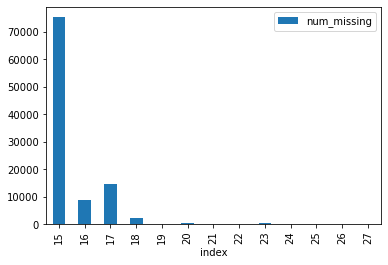

In [13]:
# Plot a missing data histogram
for column in  df.columns:
    missing=df[column].isnull()
    num_missing=np.sum(missing)
    if num_missing >0:
        print('created missing indicator for : {}'.format(column))
        df['{}_ismissing'.format(column)]=missing
ismissing_column=[column for column in df.columns if 'ismissing' in column]
df['num_missing']=df[ismissing_column].sum(axis=1)
df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index',y='num_missing')


Now that you have tried all 3 techniques for detecting missing data, did you find any? Reading through the article, which solution do you think will help you clean the data set and handle the missing data? Try out your solution below!

In [35]:
# Handle any missing data in your dataframe.
ind_missing=df[df['num_missing']>16].index
df_less_missing_rows=df.drop(ind_missing,axis=0)
df_less_missing_rows

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction_ismissing,Road Ramp_ismissing,Bridge Highway Segment_ismissing,Garage Lot Name_ismissing,Ferry Direction_ismissing,Ferry Terminal Name_ismissing,Latitude_ismissing,Longitude_ismissing,Location_ismissing,num_missing
2,31464025,09/04/2015 12:00:00 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,10310.0,758 POST AVENUE,...,True,True,True,True,True,True,False,False,False,16
3,31464026,09/04/2015 12:00:00 AM,09/14/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11206.0,198 SCHOLES STREET,...,True,True,True,True,True,True,False,False,False,15
4,31464027,09/04/2015 12:00:00 AM,09/22/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10462.0,2138 WALLACE AVENUE,...,True,True,True,True,True,True,False,False,False,15
5,31464188,09/04/2015 12:00:00 AM,09/22/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11231.0,179 LUQUER STREET,...,True,True,True,True,True,True,False,False,False,15
6,31464195,09/04/2015 12:00:00 AM,09/22/2015 04:26:36 PM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11354.0,33-38 PARSONS BOULEVARD,...,True,True,True,True,True,True,False,False,False,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101908,35494905,02/14/2017 12:00:00 AM,02/22/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11216.0,1236 ATLANTIC AVENUE,...,True,True,True,True,True,True,False,False,False,15
101909,35494908,02/15/2017 12:00:00 AM,01/31/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,11207.0,2515 ATLANTIC AVENUE,...,True,True,True,True,True,True,False,False,False,15
101911,35494945,02/14/2017 12:00:00 AM,02/16/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,11213.0,98 ALBANY AVENUE,...,True,True,True,True,True,True,False,False,False,15
101912,35494970,02/14/2017 12:00:00 AM,01/17/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,11105.0,22-68 46 STREET,...,True,True,True,True,True,True,False,False,False,15


## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers. The article outlines the top techniques for finding outliers in a dataset.

array([[<AxesSubplot:title={'center':'Unique Key'}>,
        <AxesSubplot:title={'center':'Incident Zip'}>,
        <AxesSubplot:title={'center':'Facility Type'}>,
        <AxesSubplot:title={'center':'X Coordinate (State Plane)'}>],
       [<AxesSubplot:title={'center':'Y Coordinate (State Plane)'}>,
        <AxesSubplot:title={'center':'School or Citywide Complaint'}>,
        <AxesSubplot:title={'center':'Vehicle Type'}>,
        <AxesSubplot:title={'center':'Taxi Company Borough'}>],
       [<AxesSubplot:title={'center':'Taxi Pick Up Location'}>,
        <AxesSubplot:title={'center':'Bridge Highway Name'}>,
        <AxesSubplot:title={'center':'Bridge Highway Direction'}>,
        <AxesSubplot:title={'center':'Road Ramp'}>],
       [<AxesSubplot:title={'center':'Bridge Highway Segment'}>,
        <AxesSubplot:title={'center':'Garage Lot Name'}>,
        <AxesSubplot:title={'center':'Ferry Direction'}>,
        <AxesSubplot:title={'center':'Ferry Terminal Name'}>],
       [<AxesSubp

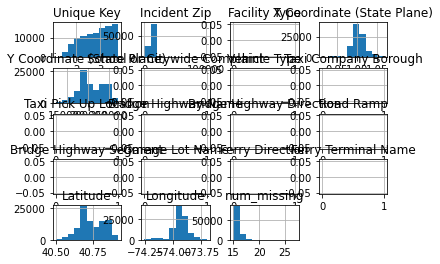

In [30]:
# Plot a histogram to see if there are any outliers.
df.hist(bins=10)

In [36]:
# Use the describe() method


In [9]:
# Plot a bar chart


Which of the three techniques helped you find any outliers? Now that you have found outliers, what will you do to solve the problem?

In [10]:
# Handle any outliers in your dataframe

## Unnecessary Data

Unnecessary data could be duplicates, irrelevant, or any uninformative data. Dive into each type of unnecessary data to see if there is any in the data set. Make sure to make note of how you would handle each type of unnecessary data.

In [41]:
# Look for any irrelevant data in the dataframe. How will you handle it?
df=pd.read_csv("Rat_Sightings.csv")
df.drop(['Ferry Direction','Vehicle Type','Taxi Company Borough','Bridge Highway Direction','Garage Lot Name'],axis=1)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Not Found,School or Citywide Complaint,Taxi Pick Up Location,Bridge Highway Name,Road Ramp,Bridge Highway Segment,Ferry Terminal Name,Latitude,Longitude,Location
0,31464015,09/04/2015 12:00:00 AM,09/18/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10006.0,NaN,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.707772,-74.012963,"(40.70777155363643, -74.01296309970473)"
1,31464024,09/04/2015 12:00:00 AM,10/28/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,10306.0,2270 HYLAN BOULEVARD,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.575209,-74.104547,"(40.575209242947444, -74.1045465185469)"
2,31464025,09/04/2015 12:00:00 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,10310.0,758 POST AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.631236,-74.126878,"(40.63123555151668, -74.12687759748677)"
3,31464026,09/04/2015 12:00:00 AM,09/14/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11206.0,198 SCHOLES STREET,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.708987,-73.941207,"(40.70898692345805, -73.94120690238431)"
4,31464027,09/04/2015 12:00:00 AM,09/22/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10462.0,2138 WALLACE AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.854130,-73.864813,"(40.85413014360452, -73.86481331044513)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101909,35494908,02/15/2017 12:00:00 AM,01/31/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,11207.0,2515 ATLANTIC AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.675635,-73.901327,"(40.67563538613833, -73.90132744872707)"
101910,35494944,02/14/2017 12:00:00 AM,02/23/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11233.0,829 HALSEY STREET,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.685525,-73.919406,"(40.685525167695936, -73.91940607172907)"
101911,35494945,02/14/2017 12:00:00 AM,02/16/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,11213.0,98 ALBANY AVENUE,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.677325,-73.938679,"(40.67732468990624, -73.93867870955741)"
101912,35494970,02/14/2017 12:00:00 AM,01/17/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,11105.0,22-68 46 STREET,...,N,NaN,NaN,NaN,NaN,NaN,NaN,40.769171,-73.903860,"(40.76917070274182, -73.90386041412091)"


In [37]:
# Look for duplicates. How will you handle any duplicates?
df.duplicated().sum()

0

In [ ]:
# Think about what data in the dataframe may be uninformative. Make note here of what situations may render data uninformative and how you would handle it?

## Inconsistent Data

Inconsistent data is anything that messes with your model. This is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [44]:
# Try to convert all the strings in a column to lower or upper case. 
df['Incident Address'].str.lower()

0                          NaN
1         2270 hylan boulevard
2              758 post avenue
3           198 scholes street
4          2138 wallace avenue
                  ...         
101909    2515 atlantic avenue
101910       829 halsey street
101911        98 albany avenue
101912         22-68 46 street
101913       89 lefferts place
Name: Incident Address, Length: 101914, dtype: object